In [139]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np
import math
import warnings
from scipy.stats import yeojohnson
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Importation des modules pour la normalisation des données
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import 
from sklearn.cluster import KMeans
from sklearn import metrics

In [140]:
data = pd.read_csv("DATASET/Fromages.csv", delimiter=";", decimal=",")

In [141]:
data.head(10)

,Fromages,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
0,CarreDelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [142]:
data.shape

(29, 10)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fromages     29 non-null     object 
 1   Calories     29 non-null     int64  
 2   Sodium       29 non-null     float64
 3   Calcium      29 non-null     float64
 4   Lipides      29 non-null     float64
 5   Retinol      29 non-null     float64
 6   Folates      29 non-null     float64
 7   Proteines    29 non-null     float64
 8   Cholesterol  29 non-null     int64  
 9   Magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 2.4+ KB


In [144]:
data.describe()

,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


In [145]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 10
Nombre d'enregistrements: 29
Valeurs manquantes: 0
Valeurs manquantes (%): 0.0
Features qualitatives: 1
Features quantitatives: 9


In [146]:
data = data.set_index("Fromages")

In [147]:
data.drop_duplicates(keep="last", inplace=True)

In [148]:
print(data.shape[0])

29


In [149]:
data = data.dropna()
print(data.isna().sum())
print(data.shape[0])

Calories       0
Sodium         0
Calcium        0
Lipides        0
Retinol        0
Folates        0
Proteines      0
Cholesterol    0
Magnesium      0
dtype: int64
29


In [150]:
data = data.select_dtypes(exclude=["object"])
print(data.shape[0])

29


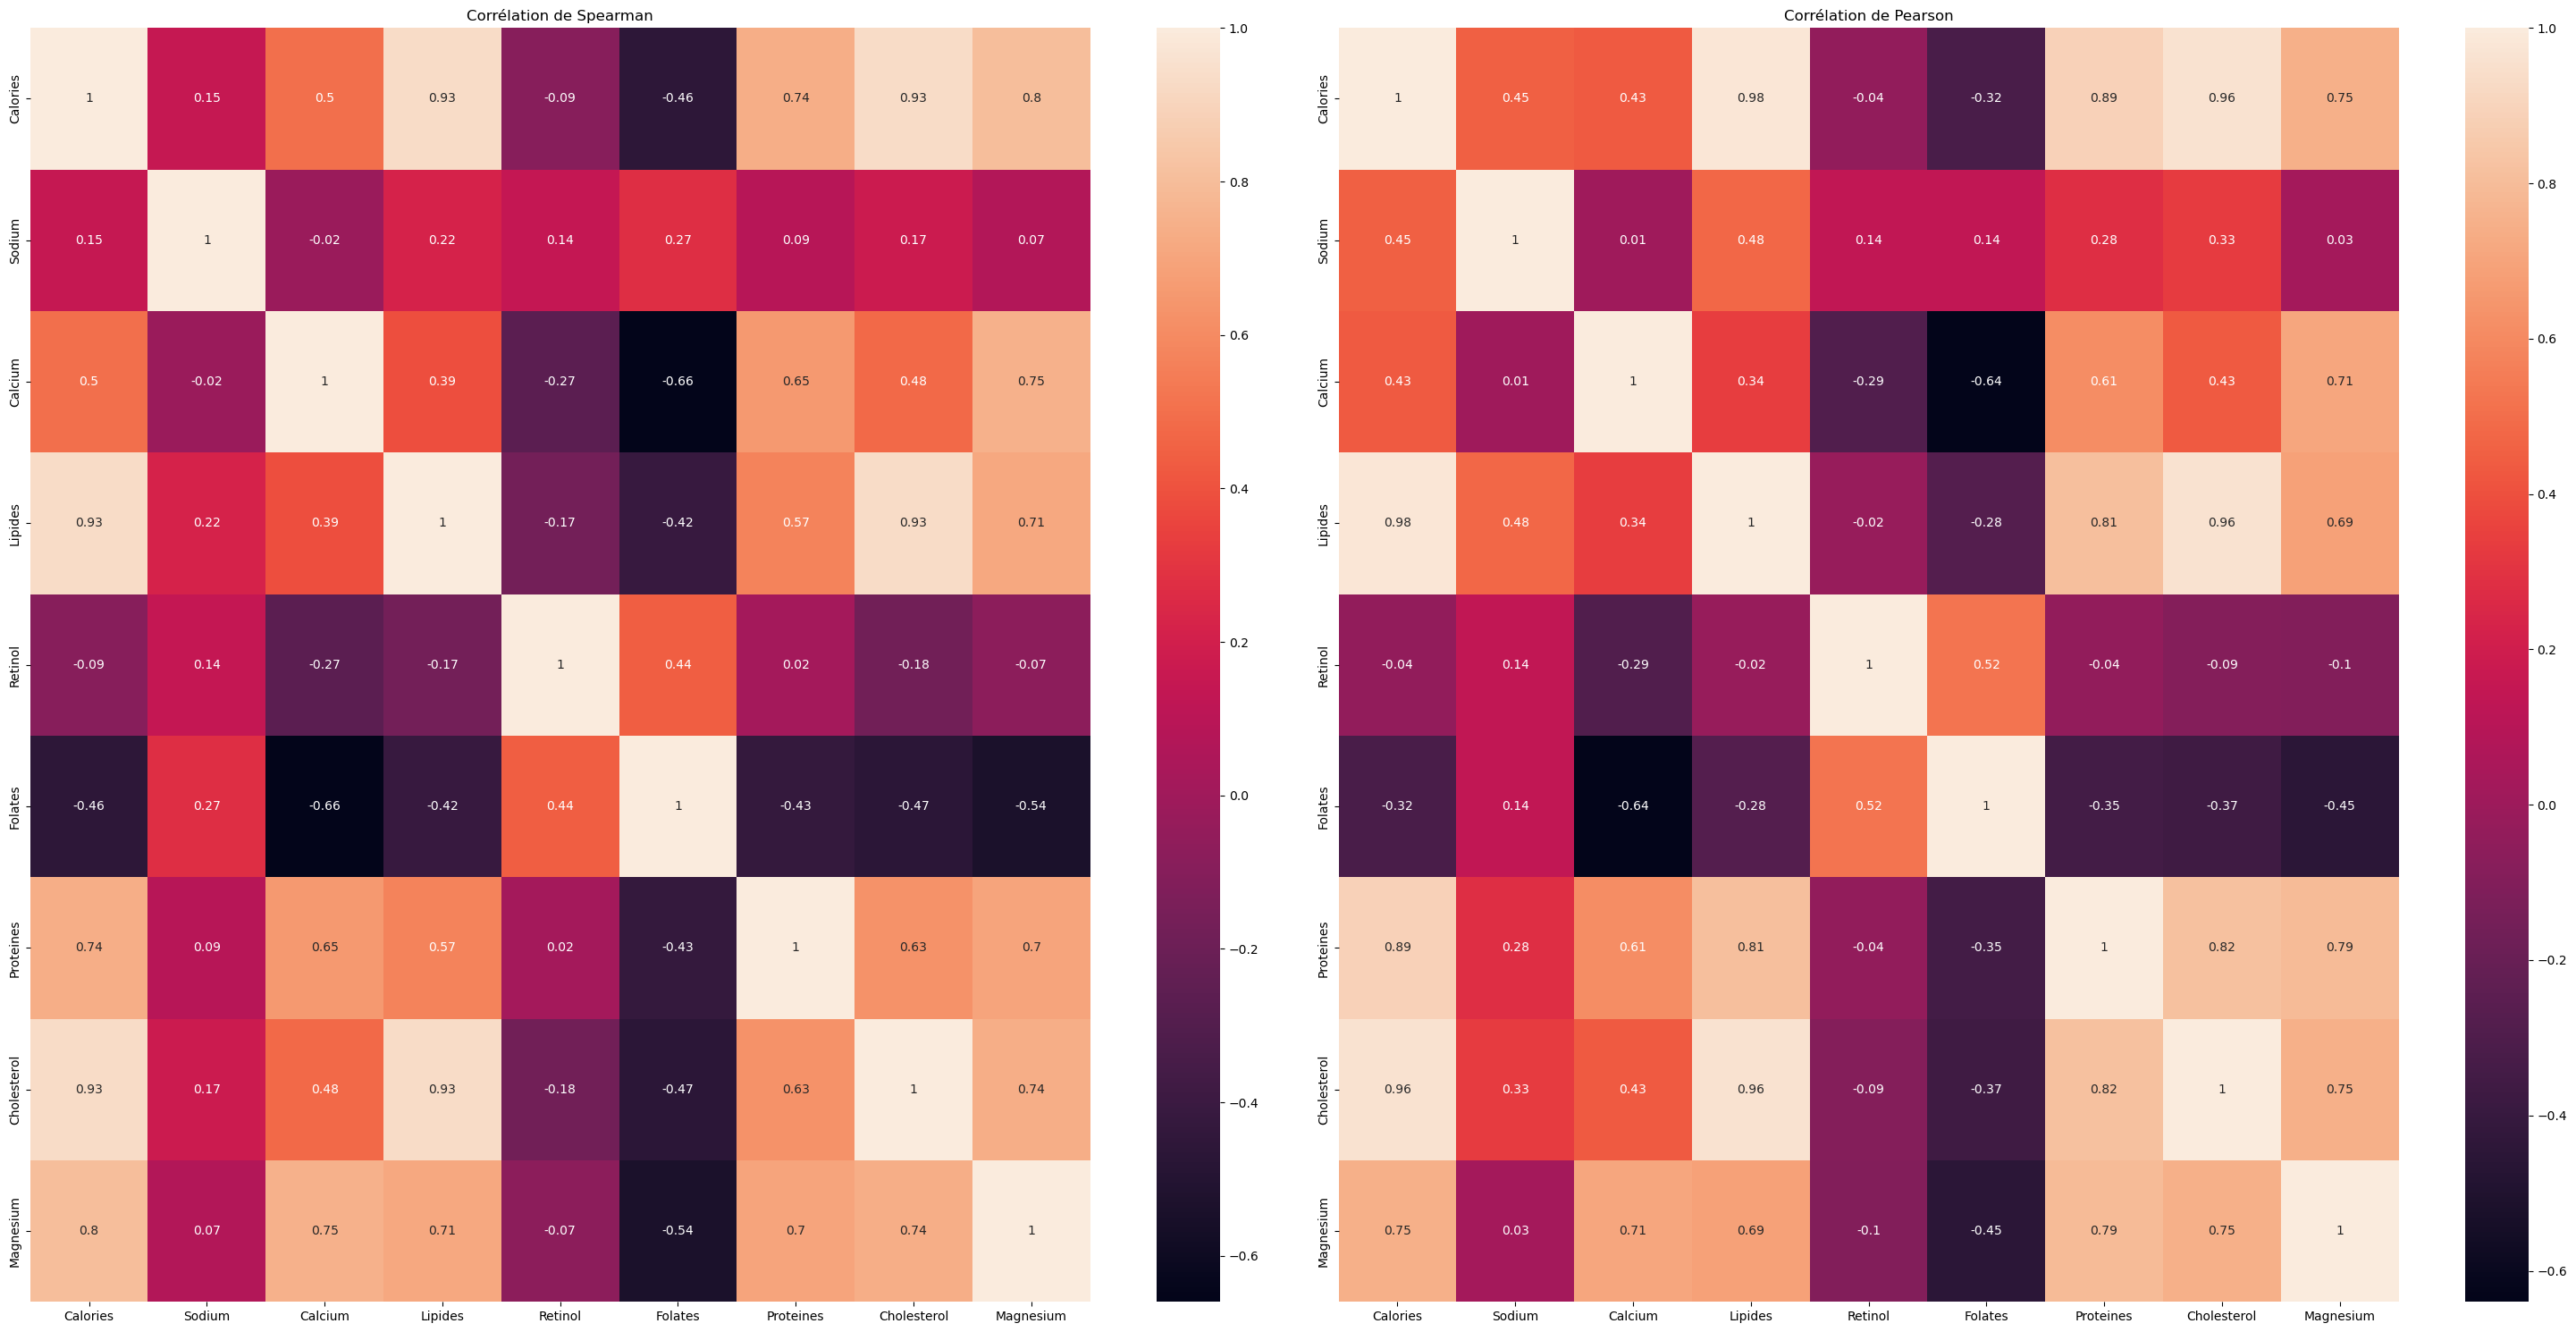

In [151]:
corr_spearman = data.corr(method="spearman").round(2)
corr_pearson = data.corr(method="pearson").round(2)

fig, axes = plt.subplots(1, 2, figsize=(30,15))


sns.heatmap(corr_spearman, annot=True, ax=axes[0])
axes[0].set_title("Corrélation de Spearman")

sns.heatmap(corr_pearson, annot=True, ax=axes[1])
axes[1].set_title("Corrélation de Pearson")

plt.tight_layout()
plt.show()

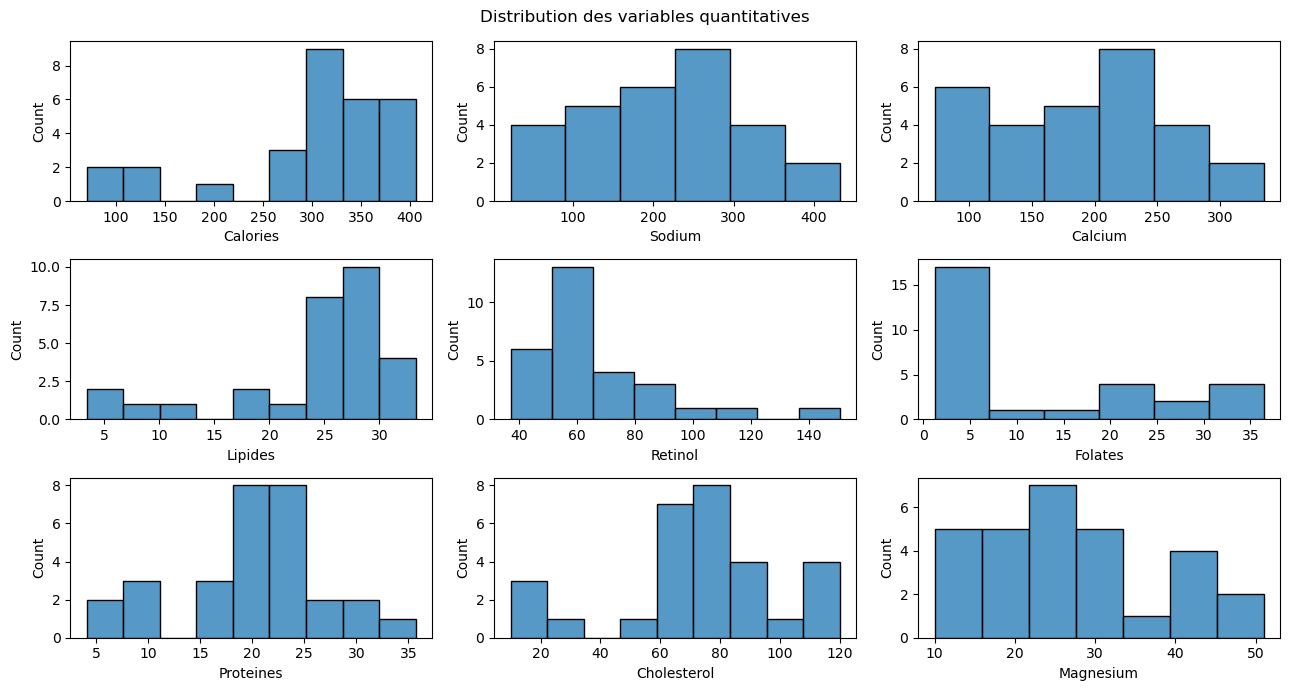

In [152]:
variable_quantitative = data

NUM_COLS = 3
NUM_ROWS = math.ceil(variable_quantitative.shape[1] / NUM_COLS)

_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(13,7))

for col, ax in zip(variable_quantitative, axes.flatten()):
    sns.histplot(x=col, data=variable_quantitative, ax=ax)
    
plt.suptitle("Distribution des variables quantitatives")
plt.tight_layout()
plt.show()

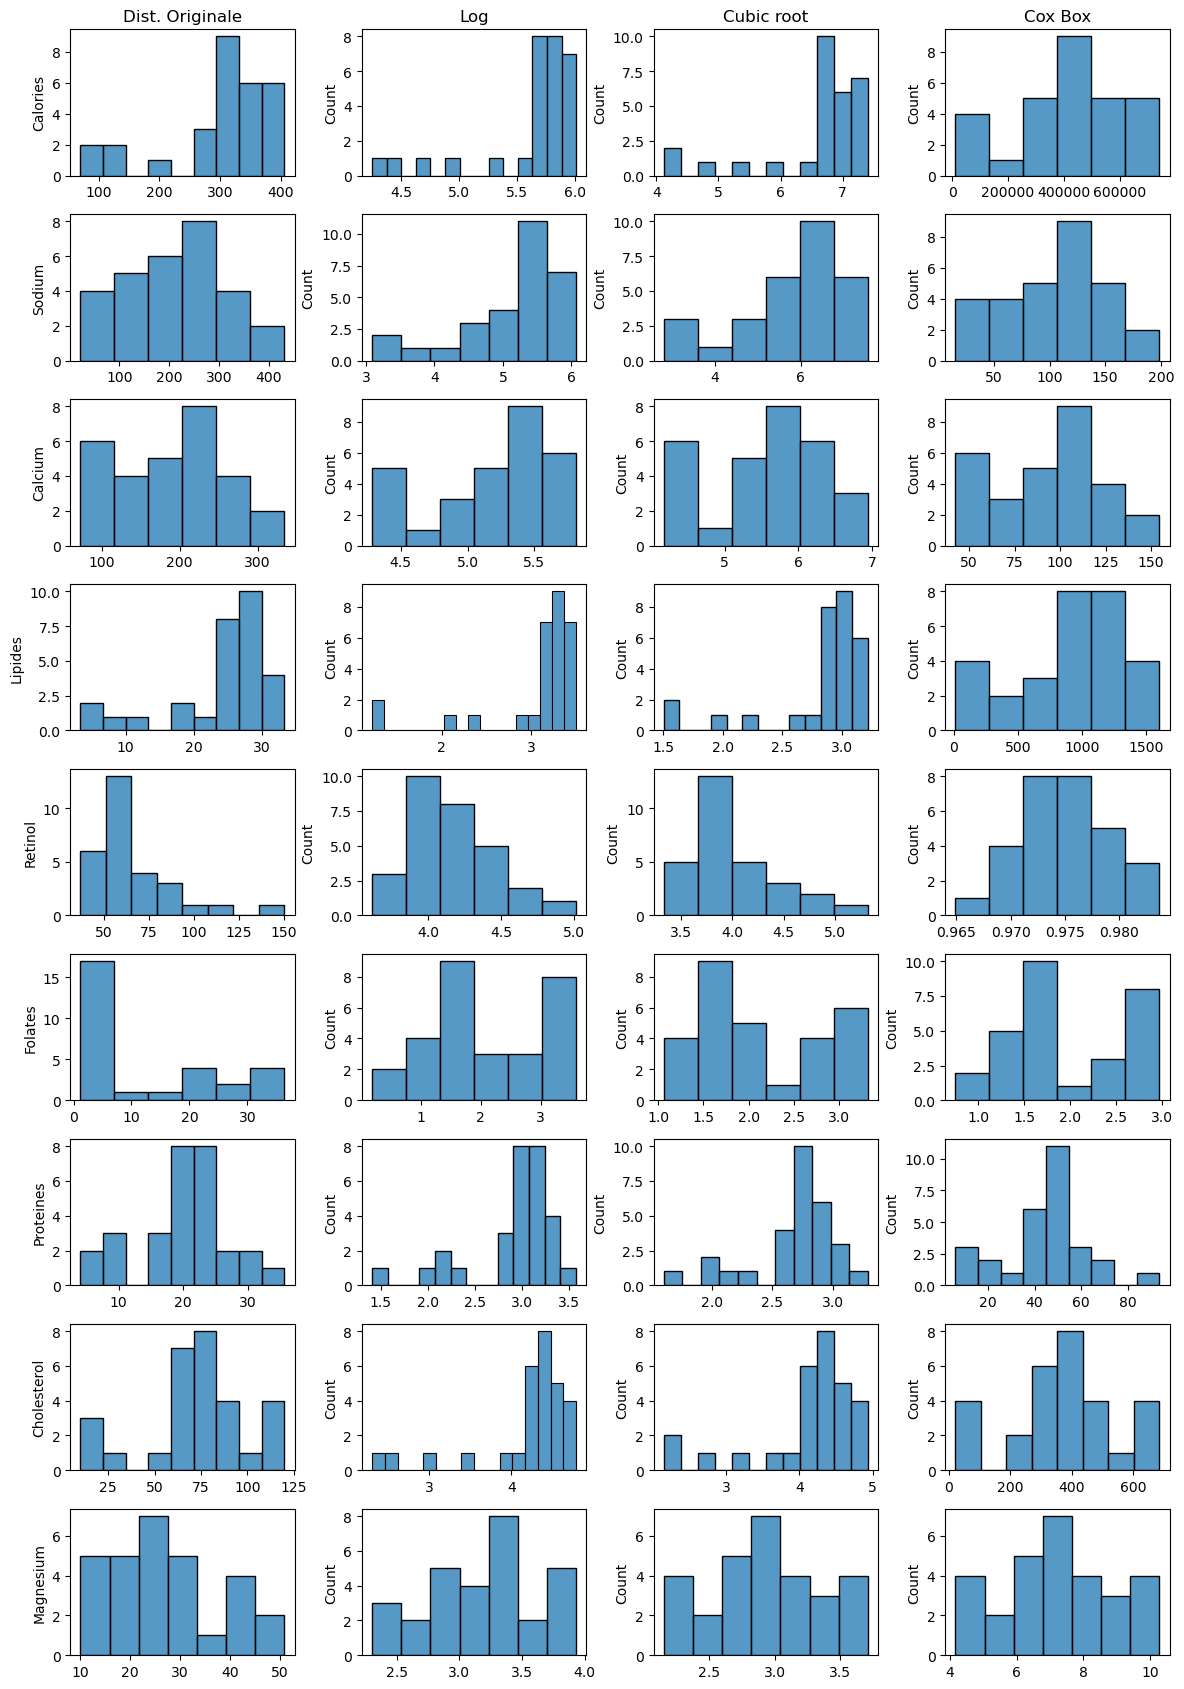

In [153]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    coi = variable_quantitative

    _, axes = plt.subplots(coi.shape[1], 4, figsize=(12, 17))

    for col_index, col_name in enumerate(coi):
        dist = coi[col_name]

        axes[col_index, 0].set_ylabel(col_name)

        # normal dist
        sns.histplot(dist.to_numpy(), ax=axes[col_index, 0])

        # log
        new_dist = np.log(dist + 1e-6)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 1])

        # cubic root
        new_dist = np.cbrt(dist)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 2])

        # cox box 
        new_dist, _  = yeojohnson(dist)
        sns.histplot(new_dist, ax=axes[col_index, 3])

    axes[0, 0].set_title("Dist. Originale")
    axes[0, 1].set_title("Log")
    axes[0, 2].set_title("Cubic root")
    axes[0, 3].set_title("Cox Box")

    plt.tight_layout()
    plt.show()

In [154]:
data = pd.DataFrame(data, columns=data.columns)

In [155]:
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)
robust_scaled_df = pd.DataFrame(data=robust_scaled_data, columns=data.columns, index = data.index)
robust_scaled_df.head()

,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
Fromages,,,,,,,,,
CarreDelEst,-0.111111,0.959559,-1.480594,0.000000,-0.431452,1.475309,0.000000,-0.5,-0.6
Babybel,-0.111111,0.110294,0.085616,-0.210526,0.056452,0.000000,0.285714,-0.5,0.1
Beaufort,1.269841,-0.816176,0.651826,1.228070,-0.298387,-0.320988,1.000000,2.0,1.5
Bleu,0.333333,0.830882,0.100457,0.456140,-1.016129,1.302469,-0.142857,0.5,0.1
Camembert,-0.904762,0.669118,0.155251,-1.192982,1.641129,1.851852,0.428571,-1.0,-0.6


In [156]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)
standard_scaled_df = pd.DataFrame(data=standard_scaled_data, columns=data.columns, index= data.index)
standard_scaled_df.head()

,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
Fromages,,,,,,,,,
CarreDelEst,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
Babybel,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920
Bleu,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101
Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309


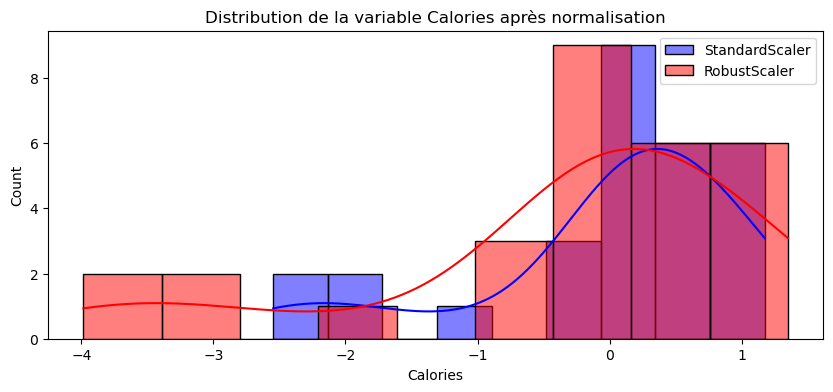

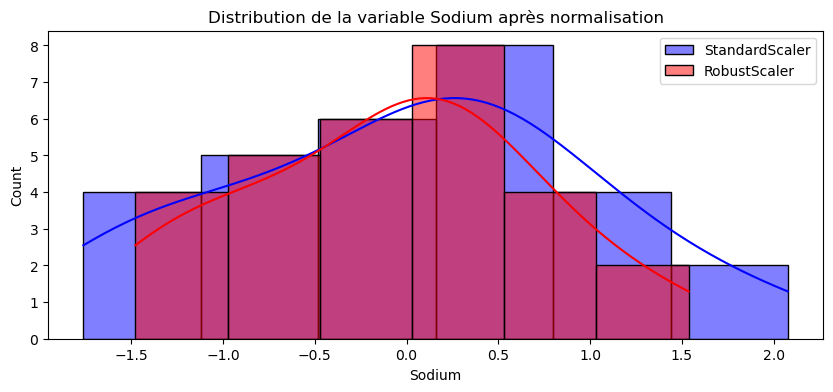

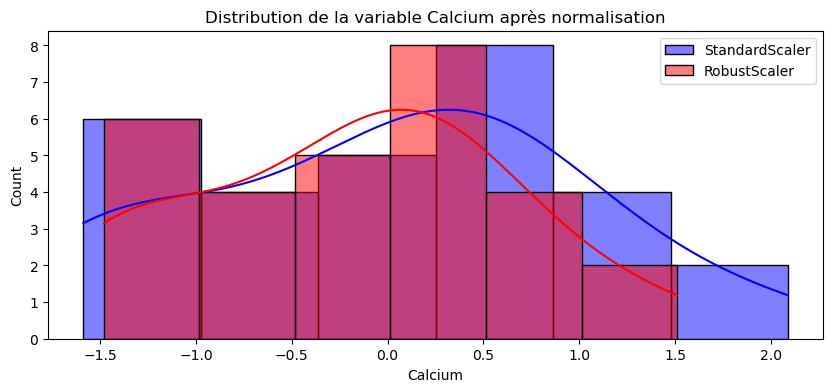

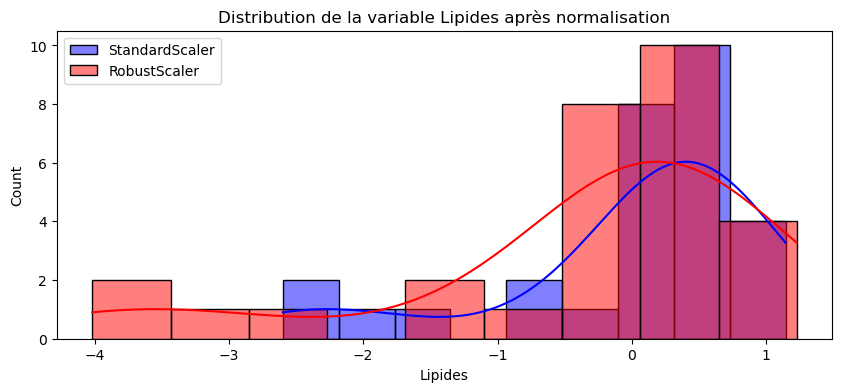

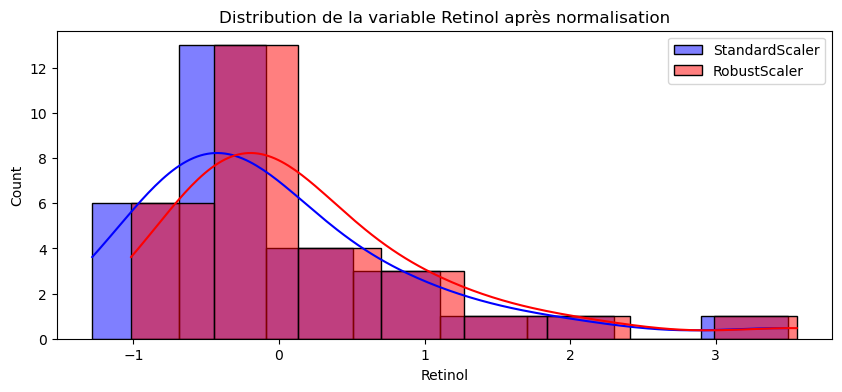

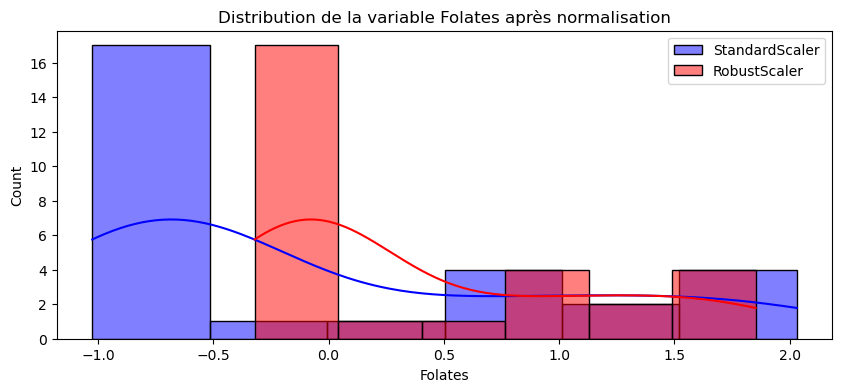

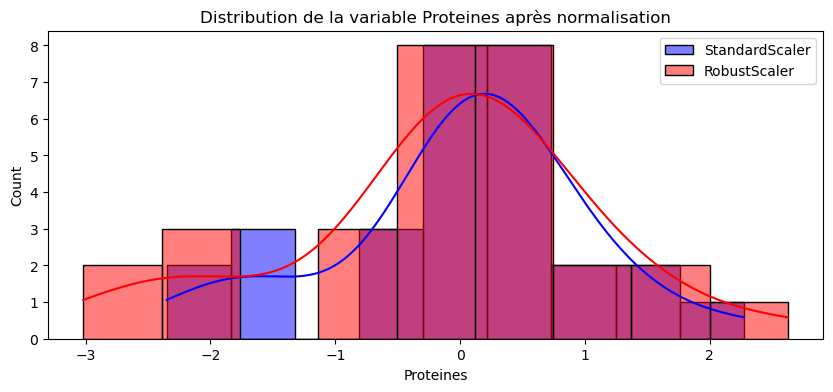

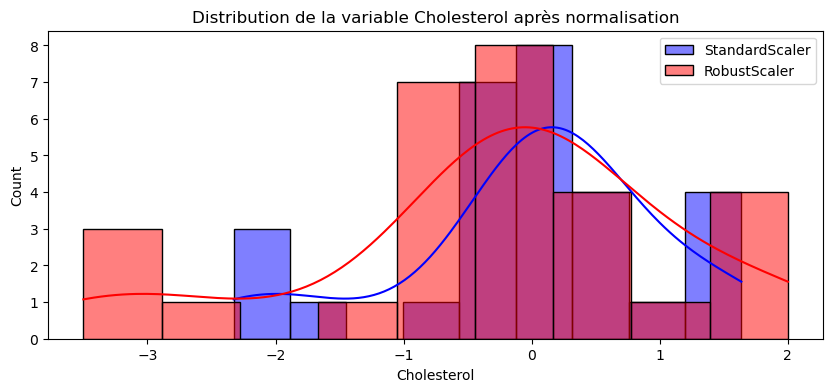

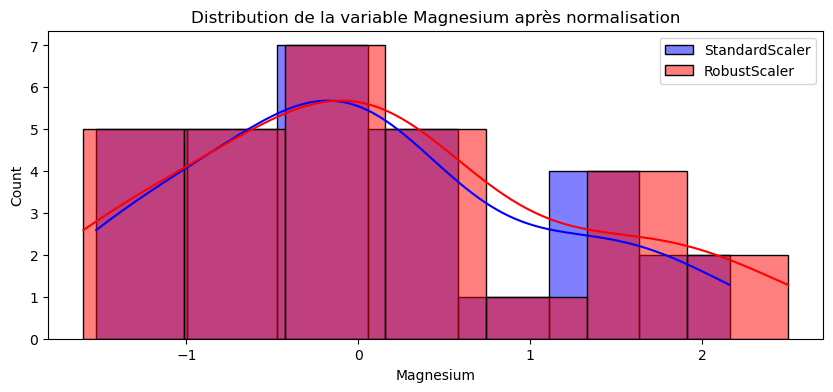

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que standard_scaled_df et robust_scaled_df sont vos DataFrames normalisés
variables = data.columns  # Les noms des colonnes de votre DataFrame original

for var in variables:
    plt.figure(figsize=(10, 4))

    # Histogramme pour StandardScaler
    sns.histplot(standard_scaled_df[var], color="blue", label="StandardScaler", kde=True)

    # Histogramme pour RobustScaler
    sns.histplot(robust_scaled_df[var], color="red", label="RobustScaler", kde=True)

    plt.title(f"Distribution de la variable {var} après normalisation")
    plt.legend()
    plt.show()

In [158]:
data_scaled = standard_scaled_df
data_scaled.head()

,Calories,Sodium,Calcium,Lipides,Retinol,Folates,Proteines,Cholesterol,Magnesium
Fromages,,,,,,,,,
CarreDelEst,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
Babybel,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920
Bleu,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101
Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309


In [159]:
# svd_solver:
# full: pour les petits datasets
# arpack, randomized: pour les datasets de taille moyenne
# randomized: pour les grands datasets (pour sa vitesse)
# auto: incertain
acp = PCA(svd_solver="full")

In [160]:
coord = acp.fit_transform(data_scaled)
print(coord)

[[ 6.41901181e-01 -1.80278717e+00 -1.50744108e+00 -5.94272332e-01
   9.75072008e-01 -2.06673788e-01 -5.23195251e-01 -2.72996812e-02
  -5.33244680e-02]
 [-4.72444914e-01  3.33175728e-01 -2.47079740e-01  3.99021308e-01
  -1.98051110e-01 -2.78605400e-01 -1.82601147e-01  1.57864544e-01
  -6.81283146e-05]
 [-2.92868343e+00  1.04937541e+00  5.56448441e-01 -8.47559684e-01
  -1.63629989e-01  1.18782260e-01  4.50192328e-01 -9.58075573e-02
  -4.42561880e-02]
 [-7.63344866e-01 -6.92700423e-01 -1.34325923e+00  6.83844833e-03
   1.52541913e+00  3.50438536e-01  5.51642136e-01  1.86233960e-02
  -2.38144474e-02]
 [ 9.74337165e-01 -1.92635759e+00  8.03938671e-01  1.39395135e+00
   1.04032561e+00 -5.87553636e-01  3.89771074e-01 -1.91054337e-01
  -4.46534089e-02]
 [-1.64673594e+00  6.21675715e-01 -6.23102641e-01  3.70700959e-01
   1.52968238e-01 -2.98132241e-02  4.08840902e-01  1.58030621e-01
   1.39127137e-01]
 [ 2.11594698e-01 -2.08746096e+00  9.74470922e-01 -1.18946238e+00
   8.34488440e-01  6.4983732

In [161]:
# Ratio de la variance expliquée pour chaque composante principale
# Explique la variance en %
# Première composante principale: Explique __% de la variance totale. Signifie que cette composante capture la majorité de l'information dans les données
# Deuxième composante principale: Explique __% de la variance totale.

print(acp.explained_variance_ratio_)

[5.61012646e-01 2.04935374e-01 9.64223245e-02 6.41538526e-02
 3.94677950e-02 1.94790658e-02 1.08260237e-02 3.15901368e-03
 5.43905072e-04]


In [162]:
# Valeurs propres

eigval = acp.explained_variance_
print([eigval])

[array([5.22943931e+00, 1.91029045e+00, 8.98793811e-01, 5.98005554e-01,
       3.67896232e-01, 1.81572721e-01, 1.00914007e-01, 2.94465204e-02,
       5.06997228e-03])]


In [163]:
num_samples = data.shape[0]
num_features = data.shape[1]
pca_threshold = 1 + np.sqrt((num_features-1)/(num_samples-1))
print("PCA Threshold:", pca_threshold)

PCA Threshold: 1.5345224838248488


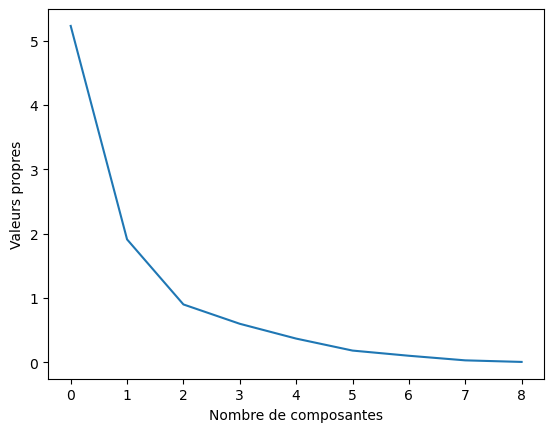

In [164]:
plt.plot(np.arange(num_features), eigval)
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes")
plt.show()

In [165]:
acp = PCA(n_components=2, svd_solver="full")
coord=acp.fit_transform(data_scaled)
print(coord)

[[ 0.64190118 -1.80278717]
 [-0.47244491  0.33317573]
 [-2.92868343  1.04937541]
 [-0.76334487 -0.69270042]
 [ 0.97433717 -1.92635759]
 [-1.64673594  0.62167571]
 [ 0.2115947  -2.08746096]
 [ 0.91401635 -2.48800307]
 [-1.90350409 -0.32790356]
 [-3.18010053  1.02494321]
 [ 0.84085401 -1.13460546]
 [-1.51773013  1.16291493]
 [-2.8769626   1.6743823 ]
 [ 3.16826783 -2.55883531]
 [ 0.25554034 -0.74898345]
 [ 4.80124463  1.8248518 ]
 [ 4.56033385  0.91187992]
 [-1.72874008  0.56232493]
 [-1.3001583   0.12510373]
 [-2.95797824  0.33655568]
 [ 4.33410754  0.85041934]
 [ 0.10194023  0.48660443]
 [-0.92593866  0.16244703]
 [-0.4583152  -0.09407671]
 [-1.07365199 -1.9028249 ]
 [-0.48172727  0.87153227]
 [-0.15819291 -0.32931643]
 [-0.66841754  1.12231053]
 [ 4.23848886  2.97335807]]


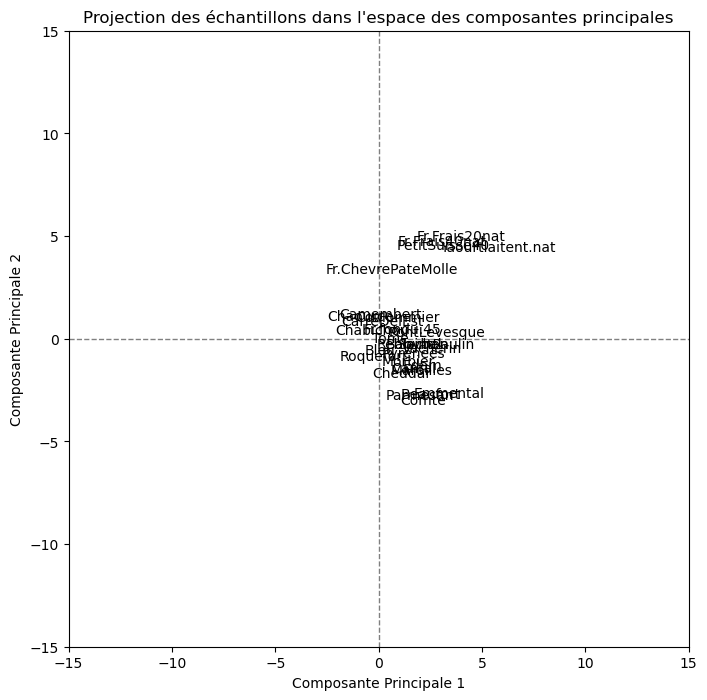

In [166]:
f, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

n = data_scaled.shape[0]

for i in range(n):
    ax.annotate(data_scaled.index[i], (coord[i, 1], coord[i, 0]))

ax.axhline(0, color="grey", linestyle="--", linewidth=1)
ax.axvline(0, color="grey", linestyle="--", linewidth=1)

ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")

ax.set_title("Projection des échantillons dans l'espace des composantes principales")

plt.show()

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

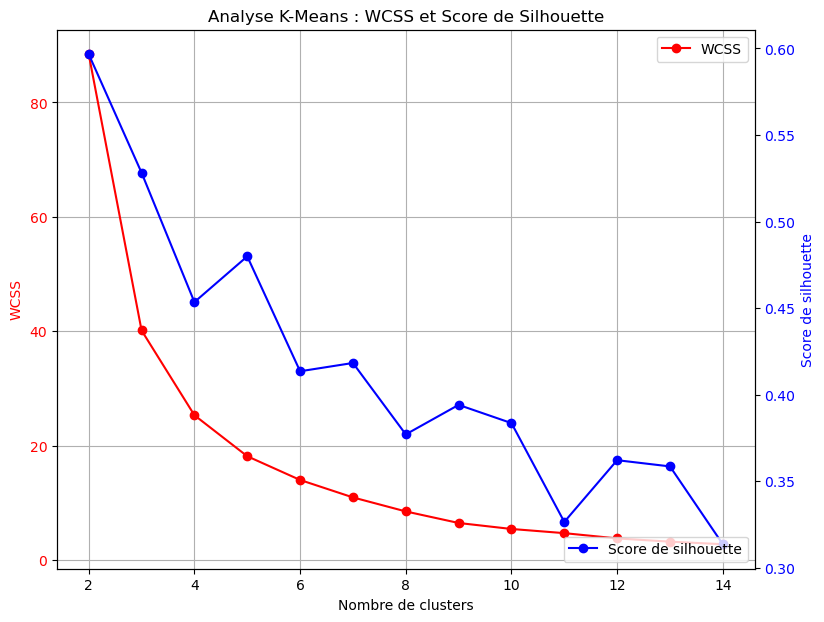

In [167]:
# Initialisation des listes pour stocker les résultats
wcss = []
res = []

# Plage de nombres de clusters à tester
clusters_range = range(2, 15)

# Boucle sur différents nombres de clusters
for k in clusters_range:
    km = KMeans(n_clusters=k, n_init=20, max_iter=300)
    km.fit(coord)
    wcss.append(km.inertia_)  # WCSS
    res.append(metrics.silhouette_score(coord, km.labels_))  # Score de silhouette

# Création de la figure pour les graphiques
fig, ax1 = plt.subplots(figsize=figsize)

# Graphique pour WCSS
ax1.plot(clusters_range, wcss, label="WCSS", color="red", marker="o")
ax1.set_xlabel("Nombre de clusters")
ax1.set_ylabel("WCSS", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.grid(True)

# Axe secondaire pour le score de silhouette
ax2 = ax1.twinx()
ax2.plot(clusters_range, res, label="Score de silhouette", color="blue", marker="o")
ax2.set_ylabel("Score de silhouette", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Légendes
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")

# Affichage du graphique
plt.title("Analyse K-Means : WCSS et Score de Silhouette")
plt.show()

In [168]:
kmeans_model = KMeans(n_clusters=3)

kmeans_model.fit(coord)

cluster_labels = kmeans_model.labels_

predicted_labels = kmeans_model.predict(coord)

wcss = kmeans_model.inertia_

print("Étiquettes de cluster:", cluster_labels)
print("Étiquettes prédites:", predicted_labels)
print("WCSS:", wcss)

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Étiquettes de cluster: [0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 2 2 1 1 1 2 1 1 1 0 1 1 1 2]
Étiquettes prédites: [0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 2 2 1 1 1 2 1 1 1 0 1 1 1 2]
WCSS: 40.15933172127961


In [169]:
silhouette_score = metrics.silhouette_score(coord, cluster_labels)
print("Score de silhouette:", silhouette_score)

Score de silhouette: 0.5281784876622562


In [170]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, n_init=20, max_iter=300)
kmeans_model.fit(coord)

cluster_labels = kmeans_model.labels_

df_with_clusters = data_scaled.copy()
df_with_clusters = pd.DataFrame(df_with_clusters)

df_with_clusters["Cluster"] = cluster_labels

print(df_with_clusters)

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                    Calories    Sodium   Calcium   Lipides   Retinol  \
Fromages                                                               
CarreDelEst         0.154630  1.342968 -1.587464  0.268066 -0.672290   
Babybel             0.154630  0.261393  0.337679  0.117846 -0.162662   
Beaufort            1.117917 -0.918507  1.033649  1.144354 -0.533301   
Bleu                0.464654  1.179093  0.355920  0.593544 -1.283000   
Camembert          -0.398983  0.973078  0.423272 -0.583184  1.492574   
Cantal              0.741460  0.429950  1.098195  0.581026 -0.790220   
Chabichou           0.486798 -0.169364 -1.382602  0.468361  0.949252   
Chaource           -0.088960  0.617236 -0.741355  0.155401  2.056954   
Cheddar             1.173279 -0.356650 -0.048191  1.044207  0.372236   
Comte               1.095773 -1.105793  0.487818  1.031688 -0.491183   
Coulommier          0.088196  0.111564 -1.494855  0.180438 -0.166874   
Edam                0.298569 -0.581393  1.213255  0.067772 -0.07

In [171]:
num_clusters = 3

valeurs_silhouette_par_echantillon = metrics.silhouette_samples(coord, kmeans_model.labels_)

moyenne_scores_silhouette = []

for i in range(num_clusters):
    moyenne_score_cluster = valeurs_silhouette_par_echantillon[kmeans_model.labels_ == i].mean()
    moyenne_scores_silhouette.append(moyenne_score_cluster)

print("Moyennes des scores de silhouette par cluster:", moyenne_scores_silhouette)

Moyennes des scores de silhouette par cluster: [0.47298610430111887, 0.5005449929725819, 0.7560056068156464]


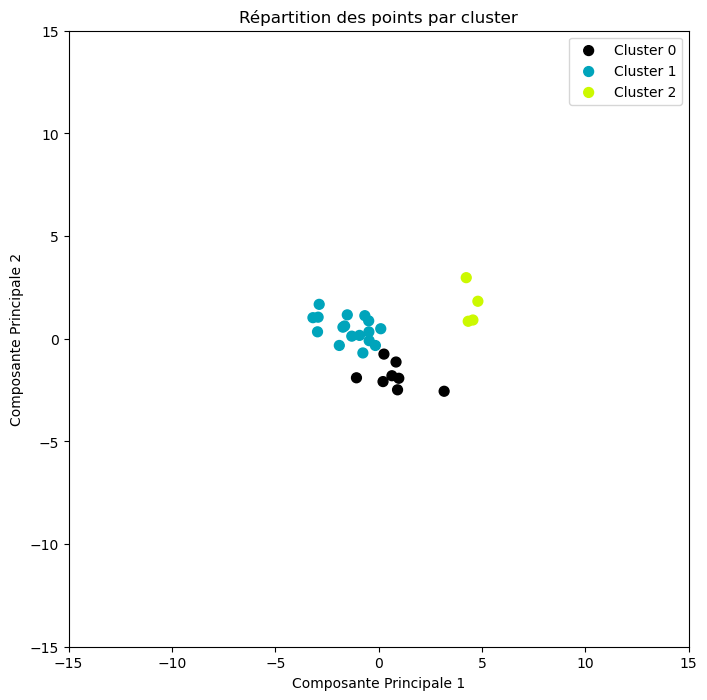

In [172]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

num_points = coord.shape[0]

palette_couleurs = cm.nipy_spectral(np.array(cluster_labels, dtype=float) / num_clusters)

for i in range(num_clusters):
    points_cluster_i = coord[cluster_labels == i]
    
    ax.scatter(points_cluster_i[:,0], points_cluster_i[:,1],
              color=palette_couleurs[cluster_labels == i], s=50, label=f"Cluster {i}")

ax.set_title("Répartition des points par cluster")
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.legend()

plt.show()

In [173]:
labels = kmeans_model.labels_
metrics.davies_bouldin_score(coord, cluster_labels)

0.5556229571705957

In [174]:
# Calcul de la moyenne globale pour chaque variable dans le dataset d'origine
moyenne_globale = np.mean(data)

# Nombre total de points dans le dataset normalisé
nombre_points_scaled = data_scaled.shape[0]

# Calcul de la variance totale (TSS) dans le dataset normalisé
variance_totale_scaled = data_scaled.var(ddof=0)
tss_scaled = nombre_points_scaled * variance_totale_scaled

# Groupement des données normalisées par clusters
groupes_par_cluster = data_scaled.groupby(cluster_labels)

# Calcul des effectifs pour chaque cluster
effectifs_par_cluster = groupes_par_cluster.size()
print("Effectifs par cluster :")
print(effectifs_par_cluster)

# Calcul des moyennes conditionnelles par cluster
moyennes_par_cluster = groupes_par_cluster.mean()
print("Moyennes par cluster :")
print(moyennes_par_cluster)

# Calcul de l'écart à la moyenne globale pour chaque groupe et variable
ecart_moyenne = (moyennes_par_cluster - moyenne_globale) ** 2

# Pondération de l'écart par les effectifs du groupe
ecart_pondere = ecart_moyenne.multiply(effectifs_par_cluster, axis=0)

# Somme de l'écart pondéré pour obtenir la variance entre les clusters (BSS)
bss = np.sum(ecart_pondere, axis=0)

# Calcul du coefficient de détermination (R²) pour le dataset normalisé
r2_scaled = bss / tss_scaled
print("Coefficient de détermination (R²) pour le dataset normalisé par variable :")
print(r2_scaled)

Effectifs par cluster :
0     8
1    17
2     4
dtype: int64
Moyennes par cluster :
   Calories    Sodium   Calcium   Lipides   Retinol   Folates  Proteines  \
0 -0.014222  0.771161 -0.867816  0.080290  1.029802  1.110267  -0.229423   
1  0.523271  0.001396  0.580014  0.488979 -0.361608 -0.593247   0.554175   
2 -2.195459 -1.548255 -0.729428 -2.238742 -0.522771  0.300766  -1.896397   

   Cholesterol  Magnesium  
0    -0.075166  -0.457717  
1     0.512974   0.547884  
2    -2.029805  -1.413071  
Coefficient de détermination (R²) pour le dataset normalisé par variable :
Calories       10502.677393
Sodium         10502.346680
Calcium        10502.330344
Lipides        10502.685239
Retinol        10502.258890
Folates        10502.410834
Proteines      10502.542587
Cholesterol    10502.576098
Magnesium      10502.361170
dtype: float64


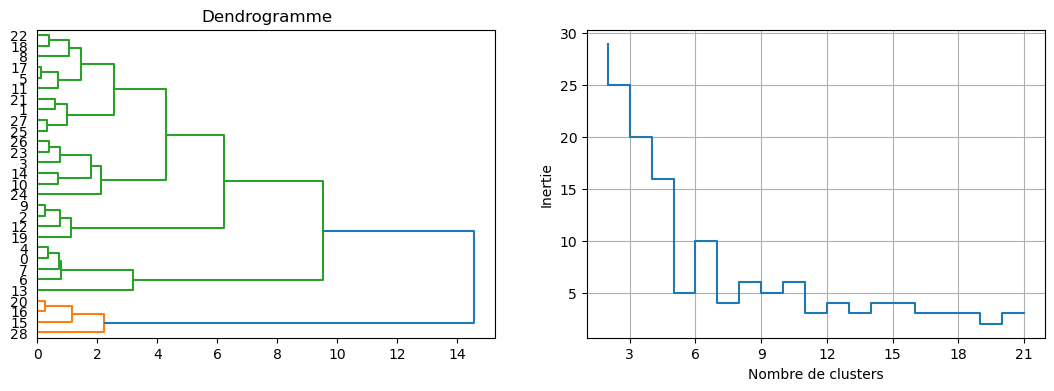

In [175]:
matrice_liens = linkage(coord, method="ward", metric="euclidean")
coed_cophenet, dists_cophenet = cophenet(matrice_liens, pdist(coord))

plt.figure(figsize = (13,4))
num_clusters=20
plt.subplot(121)
dendrogram(matrice_liens, orientation="right")
plt.title("Dendrogramme")

inerties_clusters = matrice_liens[-num_clusters:, 3]
inerties_clusters = inerties_clusters[::-1]

plt.subplot(122)
plt.step(range(2, num_clusters+2), inerties_clusters)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [204]:
CAH_model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
etiquettes_CAH_model = CAH_model.fit_predict(coord)
labels_clusters = CAH_model.labels_

print("Étiquettes de cluster:", labels_clusters)

Étiquettes de cluster: [2 0 0 0 2 0 2 2 0 0 0 0 0 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1]


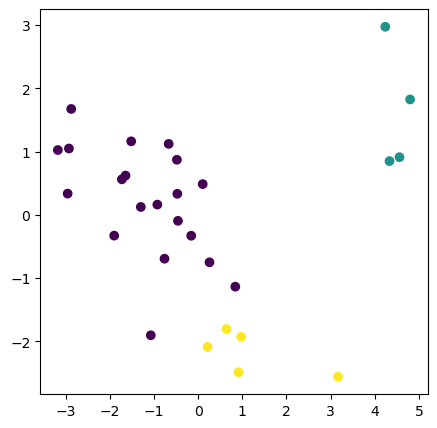

In [205]:
num_clusters = 3 
plt.figure(figsize=(5, 5))

for k in range(num_clusters):
    is_kth_cluster = (cluster_labels == k)
    ax.scatter(coord[is_kth_cluster, 0], coord[is_kth_cluster, 1], c=color[is_kth_cluster], s=50)

# Si vous voulez annoter les points, vous pouvez décommenter et adapter cette partie
# n = data_scaled.shape[0]
# for i in range(n):
#     plt.annotate(X4.index[i], (coord[i, 0], coord[i, 1]))
plt.scatter(coord[:,0], coord[:,1], c=labels_clusters)
plt.show()

In [212]:
silhouette_score_value = metrics.silhouette_score(coord, labels_clusters)

print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.4962521205098703


In [213]:
# Calcul de la moyenne globale pour chaque variable dans le dataset d'origine
moyenne_globale = np.mean(data)

# Nombre total de points dans le dataset normalisé
nombre_points_scaled = data_scaled.shape[0]

# Calcul de la variance totale (TSS) dans le dataset normalisé
variance_totale_scaled = data_scaled.var(ddof=0)
tss_scaled = nombre_points_scaled * variance_totale_scaled

# Groupement des données normalisées par clusters
groupes_par_cluster = data_scaled.groupby(cluster_labels)

# Calcul des effectifs pour chaque cluster
effectifs_par_cluster = groupes_par_cluster.size()
print("Effectifs par cluster :")
print(effectifs_par_cluster)

# Calcul des moyennes conditionnelles par cluster
moyennes_par_cluster = groupes_par_cluster.mean()
print("Moyennes par cluster :")
print(moyennes_par_cluster)

# Calcul de l'écart à la moyenne globale pour chaque groupe et variable
ecart_moyenne = (moyennes_par_cluster - moyenne_globale) ** 2

# Pondération de l'écart par les effectifs du groupe
ecart_pondere = ecart_moyenne.multiply(effectifs_par_cluster, axis=0)

# Somme de l'écart pondéré pour obtenir la variance entre les clusters (BSS)
bss = np.sum(ecart_pondere, axis=0)

# Calcul du coefficient de détermination (R²) pour le dataset normalisé
r2_scaled = bss / tss_scaled
print("Coefficient de détermination (R²) pour le dataset normalisé par variable :")
print(r2_scaled)

Effectifs par cluster :
0     8
1    17
2     4
dtype: int64
Moyennes par cluster :
   Calories    Sodium   Calcium   Lipides   Retinol   Folates  Proteines  \
0 -0.014222  0.771161 -0.867816  0.080290  1.029802  1.110267  -0.229423   
1  0.523271  0.001396  0.580014  0.488979 -0.361608 -0.593247   0.554175   
2 -2.195459 -1.548255 -0.729428 -2.238742 -0.522771  0.300766  -1.896397   

   Cholesterol  Magnesium  
0    -0.075166  -0.457717  
1     0.512974   0.547884  
2    -2.029805  -1.413071  
Coefficient de détermination (R²) pour le dataset normalisé par variable :
Calories       10502.677393
Sodium         10502.346680
Calcium        10502.330344
Lipides        10502.685239
Retinol        10502.258890
Folates        10502.410834
Proteines      10502.542587
Cholesterol    10502.576098
Magnesium      10502.361170
dtype: float64
